# imports


In [1]:
!pip install pandas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


C:\Users\basil\AppData\Local\Temp\ipykernel_8392\2872446022.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## new nn

In [204]:
np.random.seed(1)
class my_nn:
    def __init__(self, in_n = 2, h_n = 2, out_n = 1, lr=0.1):
        self.lr = lr
        
        self.in_size = in_n
        self.h_size = h_n
        self.out_size = out_n
        self.weights_0_1 = np.random.random((self.in_size, self.h_size)) #np.zeros(shape=(self.in_size, self.h_size), dtype=float) + 0.1
        self.weights_1_2 = np.random.random((self.h_size, self.out_size)) #np.zeros(shape=(self.h_size, self.out_size), dtype=float) + 0.1     
        # Creating a variable for storing matrix with output results
        self.layer_2 = np.array([])

    def activate(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative_of_sigmoid(self, x):
        #print("original: ", x)
        res = x * (1 - x)
        #print("sigra der: ", res)
        return res
        
    def forward(self, set_of_inputs):
        self.layer_0 = set_of_inputs
        sums_1 = np.dot(self.layer_0, self.weights_0_1)
        self.layer_1 = self.activate(sums_1)
        self.layer_2 = self.activate(np.dot(self.layer_1, self.weights_1_2))
        return self.layer_2
        
    def backprop(self, target_val):
        self.layer_2_error = (target_val - self.layer_2)

        self.delta_2 = self.layer_2_error * self.derivative_of_sigmoid(self.layer_2)

        self.layer_1_error = np.dot(self.delta_2, self.weights_1_2.T)

        self.delta_1 = self.layer_1_error * self.derivative_of_sigmoid(self.layer_1)

        #print(self.delta_1)
        #print(self.delta_2)

    def update_weights(self):
        self.weights_1_2 += self.lr * np.dot(self.layer_1.T, self.delta_2)
        self.weights_0_1 += self.lr * np.dot(self.layer_0.T, self.delta_1)

    def training_process(self, input_val, target_val):
        self.layer_2 = self.forward(input_val) 
        
        self.backprop(target_val)
        self.update_weights()

            
        return np.mean(np.abs(self.layer_2_error))

    def print_all(self):
        print("netword w: ")
        print(self.weights_0_1)
        print(self.weights_1_2)
        print("\n")




## line

In [34]:
train_size = 200

data_x_offset = 20
data_y_offset = 20
in_data = [] 
target_data = []
for i in range(train_size):

    if (i <train_size/2):
        in_data.append([np.random.randint(0, 20), np.random.randint(0, 4)])
        target_data.append([0])
    else:
        in_data.append([np.random.randint(0, 20), np.random.randint(5, 10)])
        target_data.append([1])


test_size = 40
in_test_data = [] 
target_test_data = []
for i in range(test_size):

    if (i < test_size/2):
        in_test_data.append([np.random.randint(0, 20), np.random.randint(0, 4)])
        target_test_data.append([0])
    else:
        in_test_data.append([np.random.randint(0, 20), np.random.randint(5, 10)])
        target_test_data.append([1])


# tilt lines

Text(0.5, 1.0, 'test data')

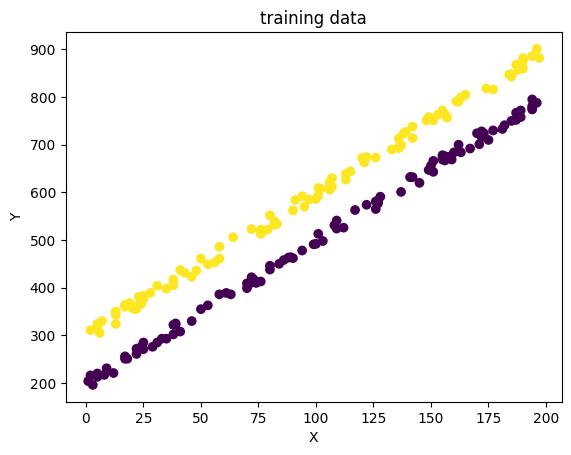

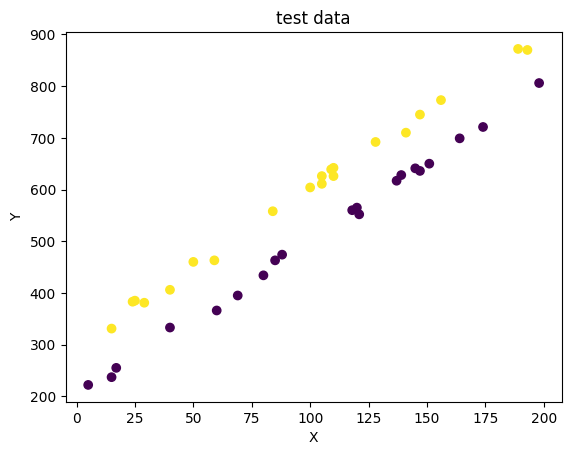

In [3]:
train_size = 200

data_x_offset = 20
data_y_offset = 20
in_data = [] 
target_data = []
for i in range(train_size):
    x = np.random.randint(0, 200);
    y = x*3 + np.random.randint(-15, 15)    
    if (i < train_size/2):
        y+=100
        target_data.append([0])
    else:
        y+=200
        target_data.append([1])
        
    in_data.append([x, y + 100])

plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")
test_size = 40
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    x = np.random.randint(0, 200);
    y = x*3 + np.random.randint(-15, 15)    
    if (i < test_size/2):
        y+=100
        target_test_data.append([0])
    else:
        y+=200
        target_test_data.append([1])
        
    in_test_data.append([x, y + 100])
plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("test data")

# xor

Text(0.5, 1.0, 'test data')

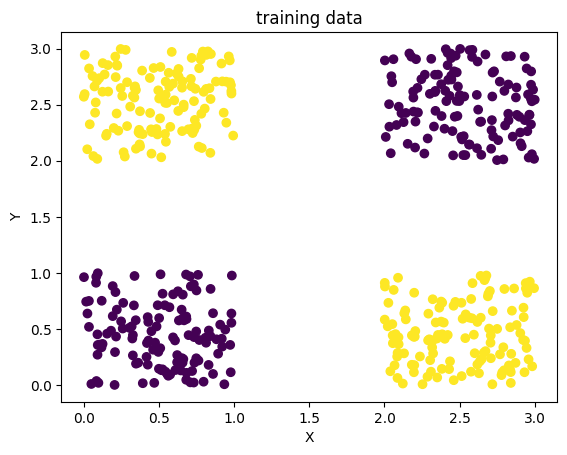

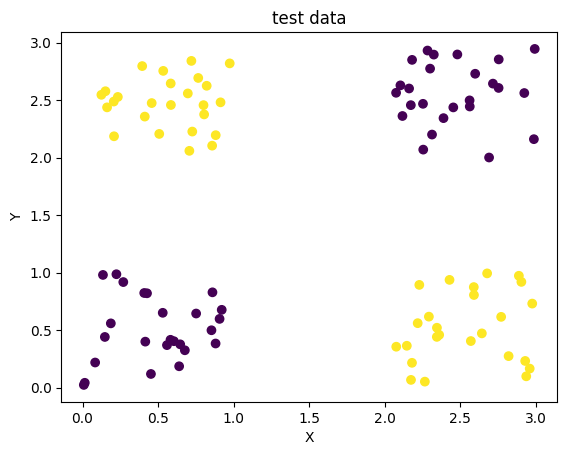

In [120]:
train_size = 500

x_a = 0
x_b = 1
x_c = 2
x_d = 3

y_a = 0
y_b = 1
y_c = 2
y_d = 3

in_data = [] 
target_data = []
for i in range(train_size):
    if (i < train_size/2):
        if (i < train_size/4):
            in_data.append([np.random.randint(x_a, x_b) + np.random.rand(), np.random.randint(y_a, y_b)+ np.random.rand()])
        else:
            in_data.append([np.random.randint(x_c, x_d)+ np.random.rand(), np.random.randint(y_c, y_d)+ np.random.rand()])
        target_data.append([0])
    else:
        if (i < 3*train_size/4):
            in_data.append([np.random.randint(x_a, x_b)+ np.random.rand(), np.random.randint(y_c, y_d)+ np.random.rand()])
        else:
            in_data.append([np.random.randint(x_c, x_d)+ np.random.rand(), np.random.randint(y_a, y_b)+ np.random.rand()])

        target_data.append([1])


test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    if (i < test_size/2):
        if (i < test_size/4):
            in_test_data.append([np.random.randint(x_a, x_b) + np.random.rand(), np.random.randint(y_a, y_b)+ np.random.rand()])
        else:
            in_test_data.append([np.random.randint(x_c, x_d)+ np.random.rand(), np.random.randint(y_c, y_d)+ np.random.rand()])
        target_test_data.append([0])
    else:
        if (i < 3*test_size/4):
            in_test_data.append([np.random.randint(x_a, x_b)+ np.random.rand(), np.random.randint(y_c, y_d)+ np.random.rand()])
        else:
            in_test_data.append([np.random.randint(x_c, x_d)+ np.random.rand(), np.random.randint(y_a, y_b)+ np.random.rand()])
        target_test_data.append([1])


plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")

plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("test data")


# circles

In [37]:
import math
train_size = 500
data_x_offset = 20
data_y_offset = 20
in_data = [] 
target_data = []
for i in range(train_size):
    theta = np.random.random() * 2 * math.pi
    if (i <train_size/2):
       
        radius = np.random.randint(0, 4)
        in_data.append([ data_x_offset + radius*math.cos(theta), data_y_offset + radius*math.sin(theta) ])

        target_data.append([0])
    else:

        radius = np.random.randint(5, 10)
        in_data.append([ data_x_offset + radius*math.cos(theta), data_y_offset + radius*math.sin(theta) ])

        target_data.append([1])

test_size = 50
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    theta = np.random.random() * 2 * math.pi
    if (i < test_size/2):
        radius = np.random.randint(0, 4)
        in_test_data.append([ data_x_offset + radius*math.cos(theta), data_y_offset + radius*math.sin(theta) ])
        target_test_data.append([0])
    else:
        radius = np.random.randint(5, 10)
        in_test_data.append([ data_x_offset + radius*math.cos(theta), data_y_offset + radius*math.sin(theta) ])
        target_test_data.append([1])


# blob XOR

Text(0.5, 1.0, 'test data')

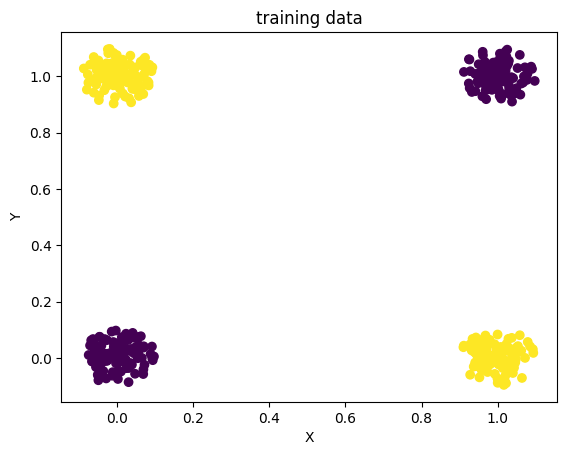

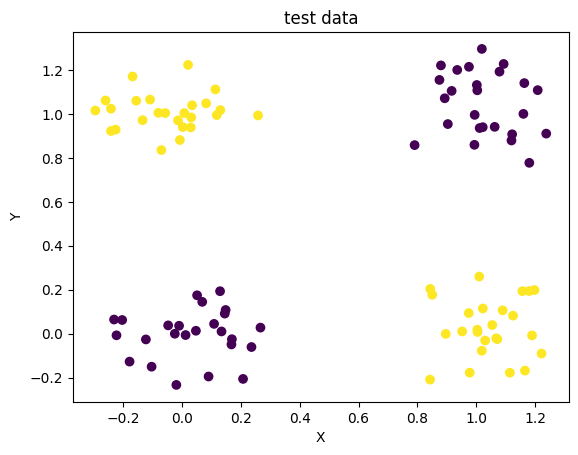

In [145]:
import math
train_size = 500
data_x_offset = 20
data_y_offset = 20
in_data = [] 
target_data = []
for i in range(train_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.1
    if (i < train_size/4):
        in_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([0])
    elif (i < 2*train_size/4):
        in_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([0])
    elif(i < 3*train_size/4):
        in_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([1])
    else:
        in_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([1])

test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.1
    if (i < test_size/4):
        in_test_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([0])
    elif (i < 2*test_size/4):
        in_test_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([0])
    elif(i < 3*test_size/4):
        in_test_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([1])
    else:
        in_test_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([1])

plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")

plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("test data")


# simple xor data set

Text(0.5, 1.0, 'test data')

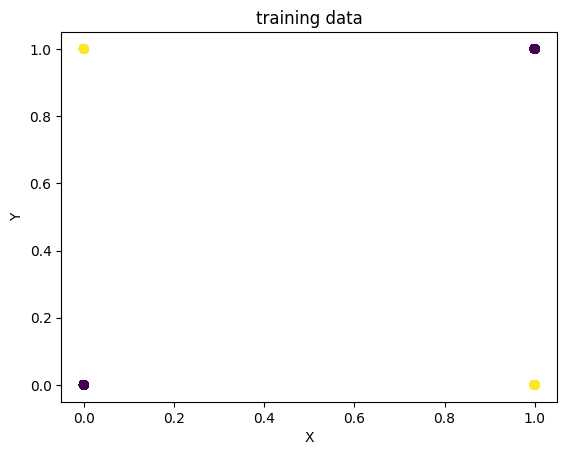

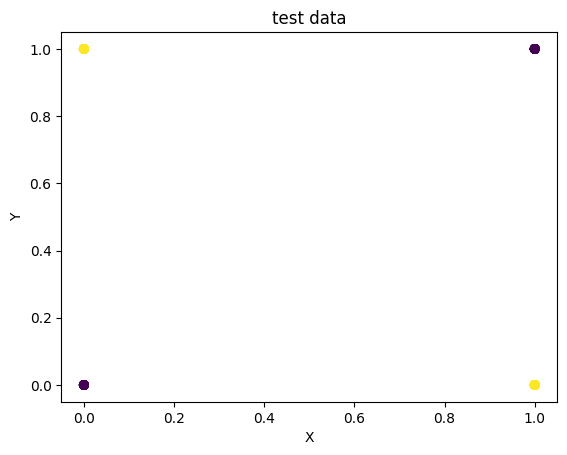

In [174]:
train_size = 1000


in_data = [] 
target_data = []
for i in range(train_size):
    if (i < train_size/2):
        if (i < train_size/4):
            in_data.append([0, 0])
        else:
            in_data.append([1,1])
        target_data.append([0])
    else:
        if (i < 3*train_size/4):
            in_data.append([1, 0])
        else:
            in_data.append([0, 1])
        target_data.append([1])


test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    if (i < test_size/2):
        if (i < test_size/4):
            in_test_data.append([0,0])
        else:
            in_test_data.append([1,1])
        target_test_data.append([0])
    else:
        if (i < 3*test_size/4):
             in_test_data.append([0,1])
        else:
            in_test_data.append([1,0])
        target_test_data.append([1])


plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")

plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("test data")


# simple XOR w/2 outputs

Text(0.5, 1.0, 'test data')

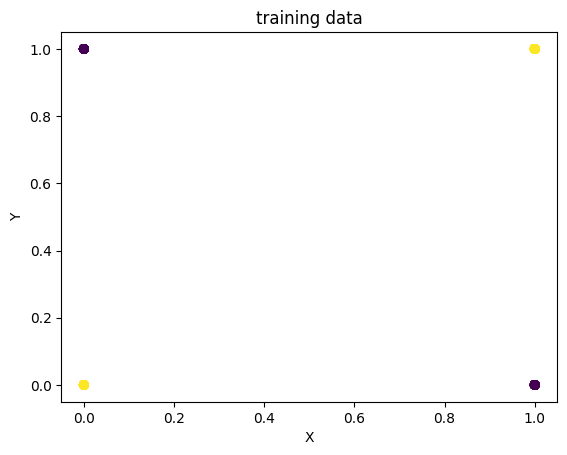

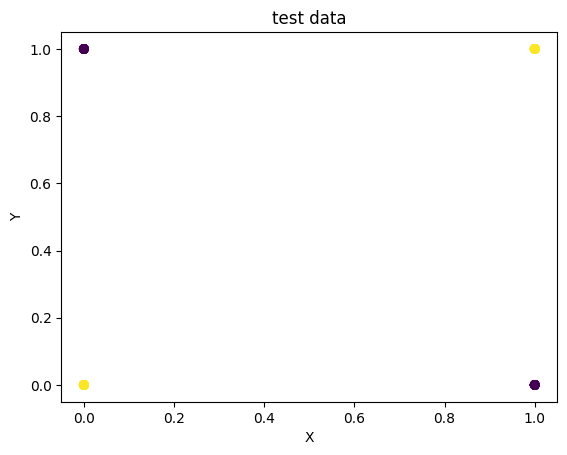

In [230]:
train_size = 500


in_data = [] 
target_data = []
for i in range(train_size):
    if (i < train_size/2):
        if (i < train_size/4):
            in_data.append([0, 0])
        else:
            in_data.append([1, 1])
        target_data.append([1, 0]) # is 1st class but not 2nd
    else:
        if (i < 3*train_size/4):
            in_data.append([1, 0])
        else:
            in_data.append([0, 1])
        target_data.append([0, 1]) # is 2ndclass


test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    if (i < test_size/2):
        if (i < test_size/4):
            in_test_data.append([0,0])
        else:
            in_test_data.append([1,1])
        target_test_data.append([1, 0])
    else:
        if (i < 3*test_size/4):
             in_test_data.append([0,1])
        else:
            in_test_data.append([1,0])
        target_test_data.append([0, 1])

plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = np.array(target_data)[:,0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")

plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = np.array(target_test_data)[:,0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("test data")

# 2output XOR blobs

Text(0.5, 1.0, 'test data')

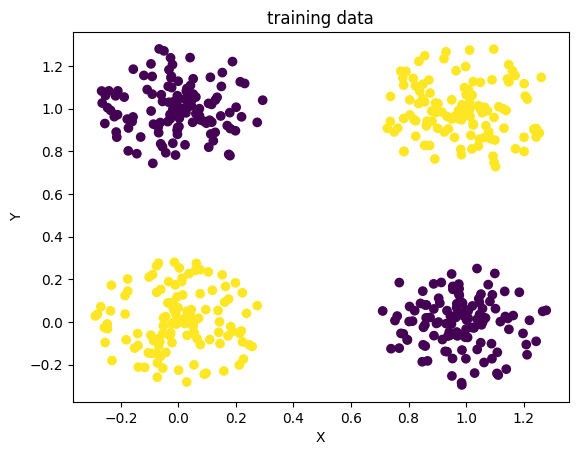

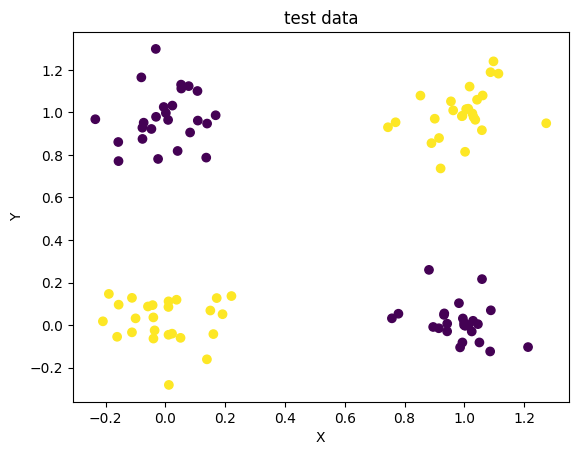

In [240]:
import math
train_size = 500


in_data = [] 
target_data = []
for i in range(train_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.3
    if (i < train_size/4):
        in_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([1, 0]) # is 1st class but not 2nd
    elif (i < 2*train_size/4):
        in_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([1, 0]) # is 1st class but not 2nd
    elif(i < 3*train_size/4):
        in_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([0, 1]) # is 2ndclass
    else:
        in_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([0, 1]) # is 2ndclass
    

test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.3
    if (i < test_size/4):
        in_test_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([1, 0])
    elif (i < 2*test_size/4):
        in_test_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([1, 0])
    elif(i < 3*test_size/4):
        in_test_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([0,1])
    else:
        in_test_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([0,1])
  
plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = np.array(target_data)[:,0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")

plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = np.array(target_test_data)[:,0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("test data")

# train and test

Text(0.5, 1.0, 'test data')

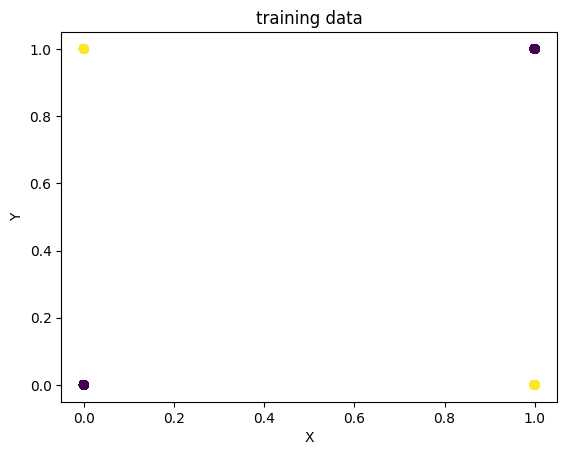

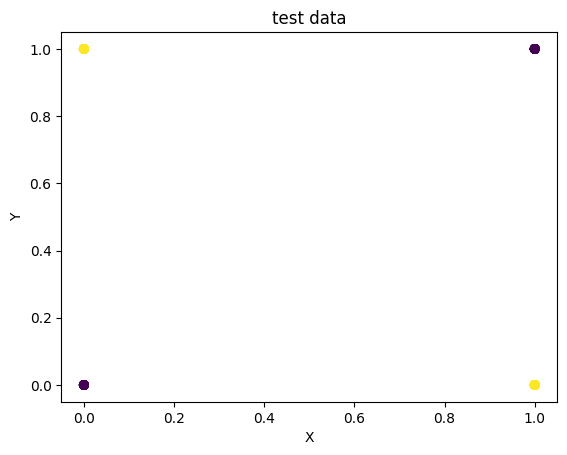

In [171]:
plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")

plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("test data")

In [141]:
test = my_nn(2, 0.1)
test.print_all()

netword w: 
[[0.13361231 0.12295684]
 [0.05580854 0.22704947]]
[[0.02208076]
 [0.58726247]]




# 1output train and test

In [190]:
test = my_nn(in_n = 2, h_n = 2, out_n = 1, lr = 0.05)
test.print_all()
num_epoch = 2

graph_err = []
graph_epoch = []
for i in range(num_epoch):
    #test.print_all()
    
    for j in range(len(in_data)):
        test.training_process(np.array([in_data[j]]), np.array([target_data[j]])) #forward(in_data)
    err_sum = 0
    for j in range(len(in_test_data)):
        res = test.forward(np.array([in_test_data[j]])) 
        err = ((target_test_data[j] - res)** 2)
        if (i > num_epoch - 2 and (target_test_data[j] - res) > 0.05 ):
            print("in ", in_test_data[j], "target ", target_test_data[j], " res ", res, " error^2 ", err)
        
        #print(err)
        err_sum += err

    #print(err_sum/6)
    graph_err.append(err_sum/len(in_test_data))
    graph_epoch.append(i)




plt.figure()
plt.scatter(graph_epoch, graph_err)
plt.xlabel('epoch')
plt.ylabel('MSE')




netword w: 
[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]]
[[0.14675589]
 [0.09233859]]


[[0. 0.]]
[[0.5 0.5]]


ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [187]:
test.print_all()

netword w: 
[[-2.23253897  3.68860313]
 [ 7.99440689  6.83327879]]
[[ 4.10136504 -4.10290216]
 [-5.16842926  5.16994206]]




# 2 outputs train and test

netword w: 
[[0.68222064 0.3106627  0.47237344]
 [0.59925587 0.37386857 0.8744878 ]]
[[0.72617259 0.9543407 ]
 [0.35106552 0.93717409]
 [0.47910057 0.64232264]]




Text(0, 0.5, 'incorrect/total')

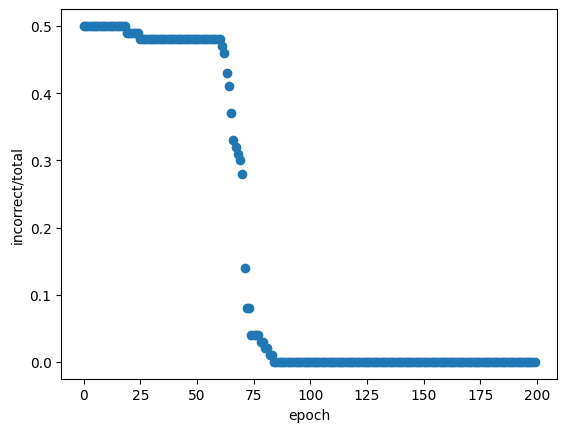

In [246]:
test = my_nn(in_n = 2, h_n = 3, out_n = 2, lr = 0.1)
test.print_all()
num_epoch = 200

graph_err = []
graph_epoch = []

test_data_size = len(in_test_data)
for i in range(num_epoch):
    
    
    for j in range(len(in_data)):
        test.training_process(np.array([in_data[j]]), np.array([target_data[j]])) #forward(in_data)
        #test.print_all()
    
    incorrect_counter = 0
    for j in range(test_data_size):
        res = test.forward(np.array([in_test_data[j]]))
        
        res_class = np.argmax(res)
        target_class = np.argmax(target_test_data[j])
        
        if (target_class != res_class):

            incorrect_counter+=1
        #err = ((target_class - res_class)** 2)
            #print("res: ", res)
            #print("target: ", target_test_data[j])
            #print(correct_counter, "/", test_data_size)

        #print(err)
        incorrect_percent = incorrect_counter/test_data_size

    #print(err_sum/6)
    graph_err.append(incorrect_percent)
    graph_epoch.append(i)




plt.figure()
plt.scatter(graph_epoch, graph_err)
plt.xlabel('epoch')
plt.ylabel('incorrect/total')



In [244]:
test_2_in = [[0,0], [0,1], [1, 0], [1,1]]
for i in range(4):
    print((test.forward(test_2_in[i])))

[0.92856317 0.07147553]
[0.0430161 0.9569652]
[0.03999874 0.95998411]
[0.99306969 0.00693812]
